# 2. An√°lisis de Datos Exproratorio (EDA)

In [29]:
import pandas as pd
import json # Para trabajar con JSON
from pandas import json_normalize
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
# Recarga autom√°tica de m√≥dulos antes de ejecutar
#%load_ext autoreload
#%autoreload 2

import warnings
warnings.filterwarnings("ignore")

- Chequeo de nulos
- valores duplicados
- valores faltantes
- tipos de datos
- an√°lisis estadist√≠co de datos
- an√°lisis de correlaciondes bi y multivariado


Ya los datos est√°n limpios, ahora es tiempo de investigar las relaciones que hay entre las variables de los datasets, ver si hay outliers o anomal√≠as (que no tienen que ser errores necesariamente üëÄ ), y ver si hay alg√∫n patr√≥n interesante que valga la pena explorar en un an√°lisis posterior. Las nubes de palabras dan una buena idea de cu√°les palabras son m√°s frecuentes en los t√≠tulos, ¬°podr√≠a ayudar al sistema de recomendaci√≥n!

similitudes entre pel√≠culas. Las columnas m√°s √∫tiles para un sistema de recomendaci√≥n ser√≠an:

title: Usada para identificar y mostrar las pel√≠culas recomendadas.
genres: La similitud en los g√©neros es clave para agrupar pel√≠culas con temas similares.
popularity o vote_average: Son columnas de inter√©s para ponderar la relevancia de la recomendaci√≥n.
overview: Puedes generar una matriz de similitud de texto a partir de descripciones.
cast y crew: Actores o directores similares pueden ayudar a mejorar la relevancia de las recomendaciones.

In [4]:
# Cargamos los datos limpios en un df
df=pd.read_parquet('D:/2024/HenryData/Py_Individual/PI_Recomendacion/Datasets/df_limpio.parquet')

In [5]:
df.head(2)

id belongs_to_collection    budget                    genres  \
0   862  Toy Story Collection  30000000   Animation Comedy Family   
1  8844        No collecction  65000000  Adventure Fantasy Family   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  When siblings Judy and Peter discover an encha...   17.015539   

                                production_companies  \
0                            Pixar Animation Studios   
1  TriStar Pictures Teitler Film Interscope Commu...   

       production_countries release_date      revenue  runtime  \
0  United States of America   1995-10-30  373554033.0     81.0   
1  United States of America   1995-12-15  262797249.0    104.0   

   spoken_languages      title  vote_average  vote_count  release_year  \
0           English  Toy Story           7.7      5415.0          1995   
1  English Fran√ßais    Jumanji           6.9      2413.0          1995   

                                        actor       director     return  
0             Tom Hanks Tim Allen Don Rickles  John Lasseter  12.451801  
1  Robin Williams Jonathan Hyde Kirsten Dunst   Joe Johnston   4.043035

In [6]:
# Informaci√≥n general del DF
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21875 entries, 0 to 21874
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     21875 non-null  int32         
 1   belongs_to_collection  21875 non-null  object        
 2   budget                 21875 non-null  int64         
 3   genres                 21875 non-null  object        
 4   overview               21875 non-null  object        
 5   popularity             21875 non-null  float64       
 6   production_companies   21875 non-null  object        
 7   production_countries   21875 non-null  object        
 8   release_date           21875 non-null  datetime64[ns]
 9   revenue                21875 non-null  float64       
 10  runtime                21853 non-null  float64       
 11  spoken_languages       21875 non-null  object        
 12  title                  21875 non-null  object        
 13  v

In [7]:
# Observamos una descripci√≥n estad√≠stica de las columnas num√©ricas
df. describe()

id        budget    popularity  \
count   21875.000000  2.187500e+04  21875.000000   
mean   109612.290971  8.239313e+06      4.381674   
min         3.000000  0.000000e+00      0.000000   
25%     18122.500000  0.000000e+00      0.750121   
50%     50674.000000  0.000000e+00      2.211854   
75%    173482.000000  2.000000e+06      6.571817   
max    465044.000000  3.800000e+08    547.488298   
std    121397.401254  2.423314e+07      8.004797   

                        release_date       revenue       runtime  \
count                          21875  2.187500e+04  21853.000000   
mean   2004-09-30 12:31:45.737142784  2.154692e+07     96.544822   
min              1981-01-01 00:00:00  0.000000e+00      0.000000   
25%              1998-01-01 00:00:00  0.000000e+00     87.000000   
50%              2007-03-28 00:00:00  0.000000e+00     95.000000   
75%              2012-11-02 00:00:00  1.046585e+05    106.000000   
max              2020-12-16 00:00:00  2.787965e+09   1140.000000   
std                              NaN  9.016443e+07     33.493147   

       vote_average    vote_count  release_year        return  
count  21875.000000  21875.000000  21875.000000  2.187500e+04  
mean       5.667031    198.929509   2004.256549  9.799200e+02  
min        0.000000      0.000000   1981.000000  0.000000e+00  
25%        5.000000      6.000000   1998.000000  0.000000e+00  
50%        5.900000     19.000000   2007.000000  0.000000e+00  
75%        6.700000     84.000000   2012.000000  0.000000e+00  
max       10.000000  14075.000000   2020.000000  1.239638e+07  
std        1.623697    682.421140      9.667968  9.094002e+04

Interpretaci√≥n: 

- Count: Indica que casi todas las columnas hay 21,875 pel√≠culas, excepto en la columna runtime 21,853, lo que indica que hay algunas filas con valores faltantes (NaN).

- Mean: Indica el promedio de los valores de las columnas, por ejemplo en budget, el presupuesto promedio de las pel√≠culas de este conjunto de datos es de aproximadamente 8.24 millones de d√≥lares. En la columna revenue indica que en promedio las pel√≠culas de este conjunto de datos recaudo 2.15 millones de d√≥lares.

- Min: muestra el valor m√≠nimo en cada columna, por ejemplo en la columnas, budget, revenue; el valor m√≠nimo es 0 los que indica que pel√≠culas sin presupuesto y recaudaci√≥n declarado.

- Max: En el caso del budget, indica que el presupuesto m√°s alto registrado en el conjunto de datos es de 3.8 millones de dolares.

- En general la mayor√≠a de las pel√≠culas tienen un presupuesto bajo o no estan declarados y un n√∫mero peque√±o de pel√≠culas tienen presupuesto muy altos o declarados.

- La popularity, tiene un rango amplio, como si algunas pel√≠culas fueran extremadamente populares, podr√≠a estar prente a un valor at√≠pico.

In [9]:
# Conteo de valores nulos por columna
print(df.isnull().sum())

id                         0
belongs_to_collection      0
budget                     0
genres                     0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                   22
spoken_languages           0
title                      0
vote_average               0
vote_count                 0
release_year               0
actor                      0
director                 244
return                     0
dtype: int64


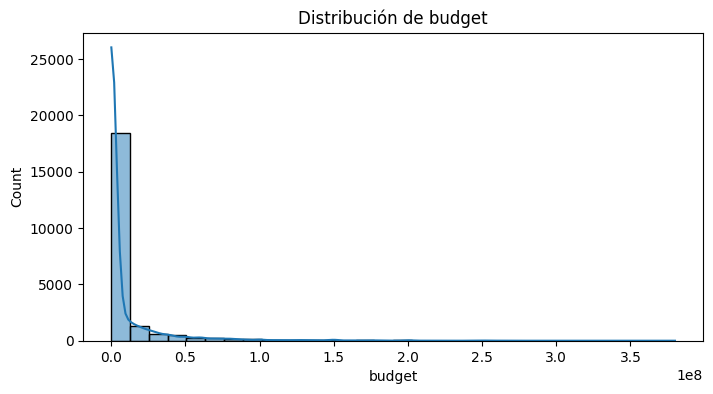

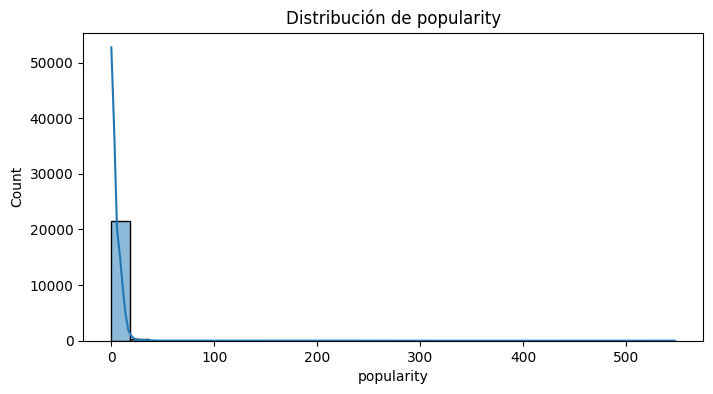

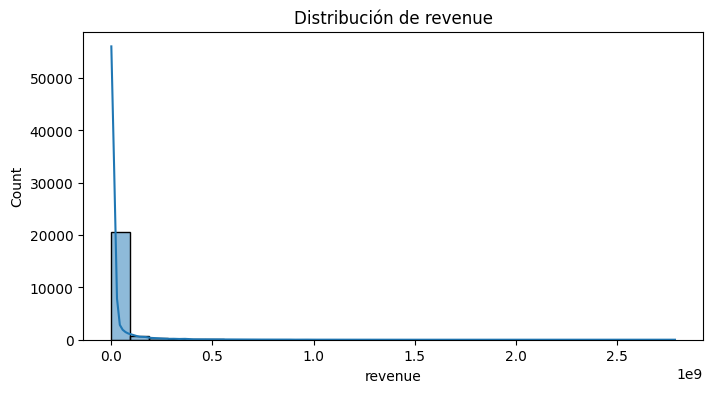

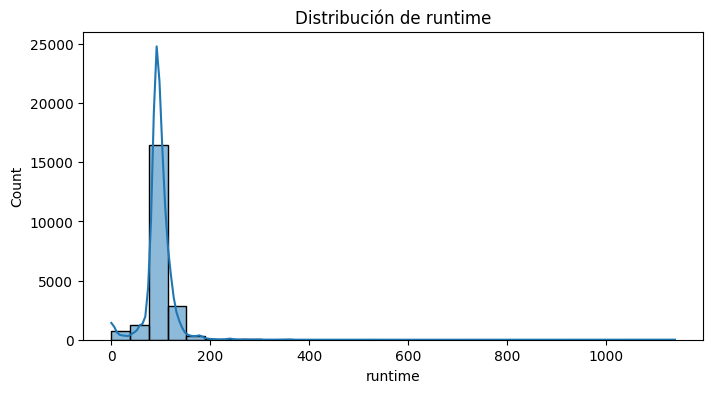

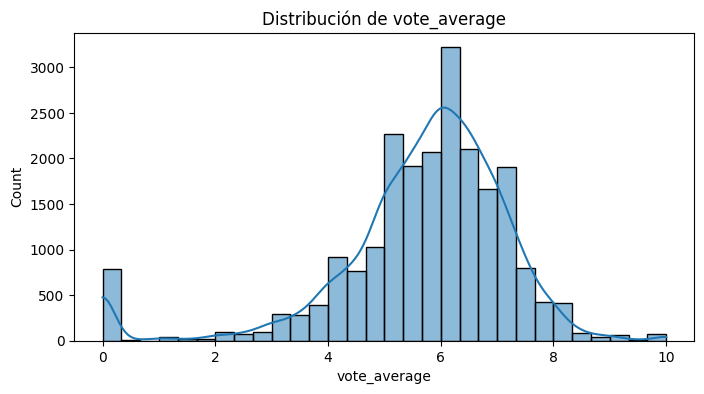

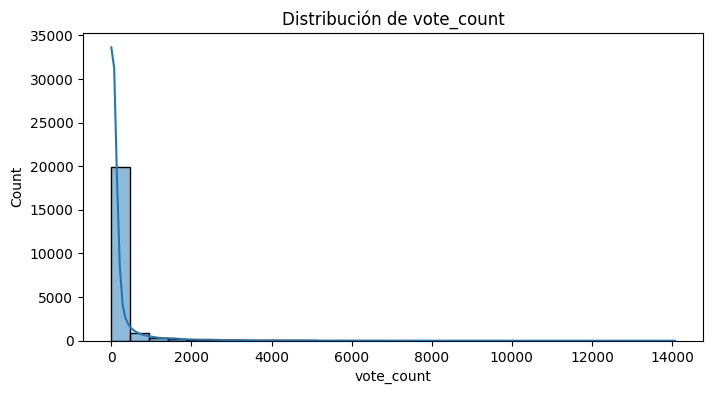

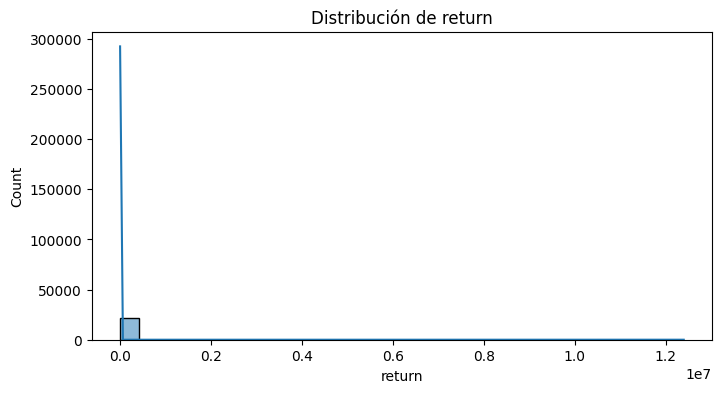

In [22]:
# Visualizaci√≥n de variables num√©ricas
numerical_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return']

# Histograma de cada variable num√©rica
for col in numerical_cols:
    plt.style.use('default')
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].fillna(0), kde=True, bins=30)
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.show()

An√°lisis de correlacion de las variables n√∫mericas

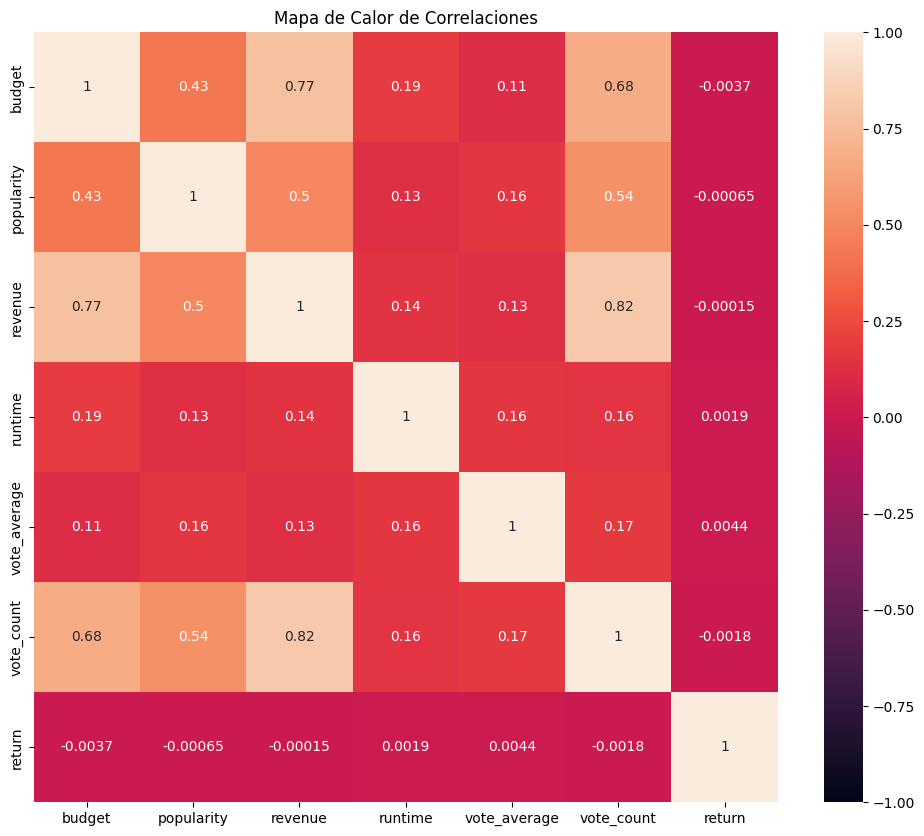

In [26]:
# Mapa de calor para visualizar correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, vmax=1, vmin=-1)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

An√°lisis de la cantidad de pel√≠culas por fecha de lanzamiento

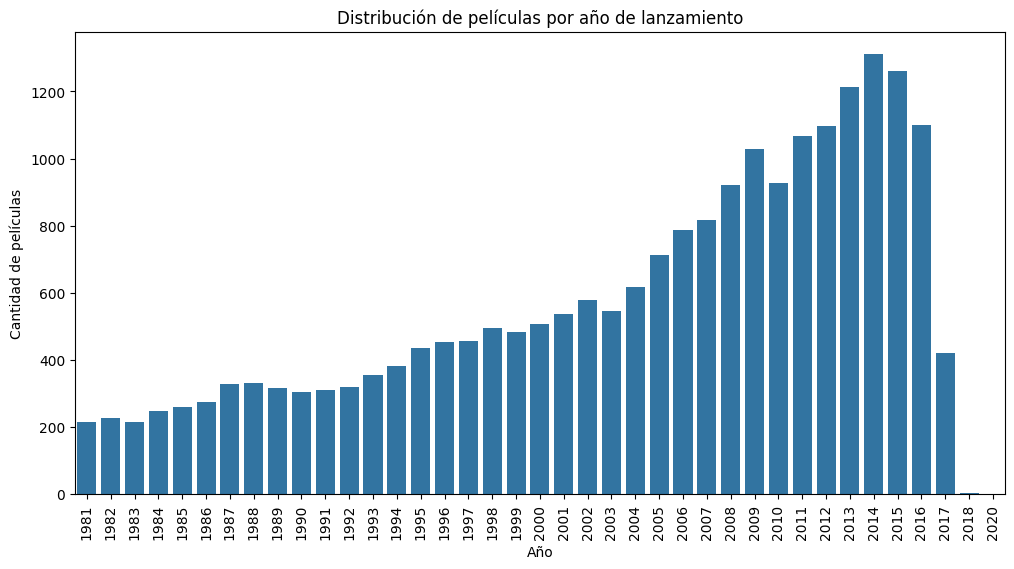

In [24]:
# Conteo de pel√≠culas por a√±o de lanzamiento
df['release_year'] = pd.DatetimeIndex(df['release_date']).year

# Visualizaci√≥n del conteo de pel√≠culas por a√±o
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].unique()))
plt.title('Distribuci√≥n de pel√≠culas por a√±o de lanzamiento')
plt.xlabel('A√±o')
plt.ylabel('Cantidad de pel√≠culas')
plt.xticks(rotation=90)
plt.show()

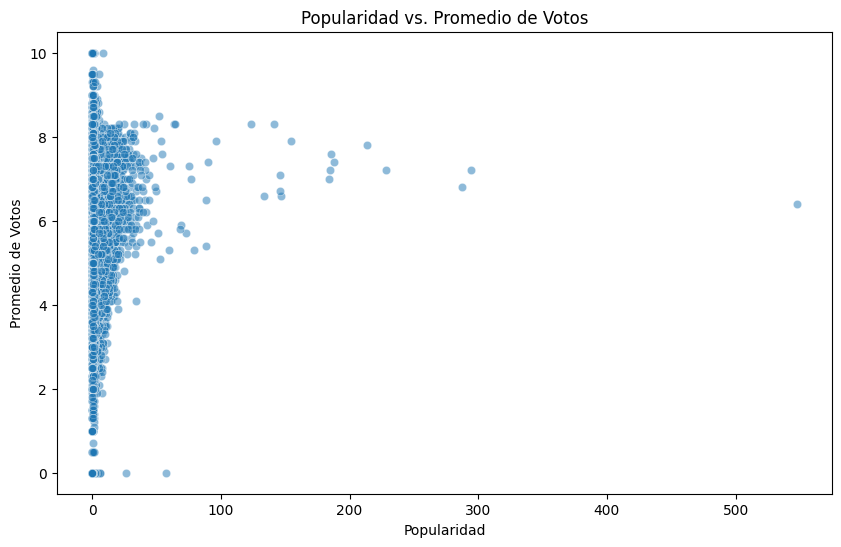

In [25]:
# Visualizaci√≥n de popularidad vs. promedio de votos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='popularity', y='vote_average', alpha=0.5)
plt.title('Popularidad vs. Promedio de Votos')
plt.xlabel('Popularidad')
plt.ylabel('Promedio de Votos')
plt.show()

An√°lisis de sentimiento 

In [32]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

# Descargar los stopwords en espa√±ol e ingl√©s
nltk.download('stopwords')
stop_words = set(stopwords.words('english') + stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to C:\Users\JS
[nltk_data]     Digital\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [33]:
# procesamiento de txt
# Limpiamos el texto de la columna `overview`
df['overview_clean'] = df['overview'].fillna('').str.lower().str.replace(r'[^\w\s]', '').str.replace(r'\d+', '')

In [34]:
# Funci√≥n para obtener la polaridad del sentimiento
def obtener_sentimiento(texto):
    return TextBlob(texto).sentiment.polarity

# Aplicamos la funci√≥n a la columna de `overview_clean`
df['sentimiento'] = df['overview_clean'].apply(obtener_sentimiento)

# Visualizamos un resumen estad√≠stico del an√°lisis de sentimientos
print(df['sentimiento'].describe())

count    21875.000000
mean         0.048545
std          0.213082
min         -1.000000
25%         -0.050000
50%          0.033333
75%          0.166667
max          1.000000
Name: sentimiento, dtype: float64


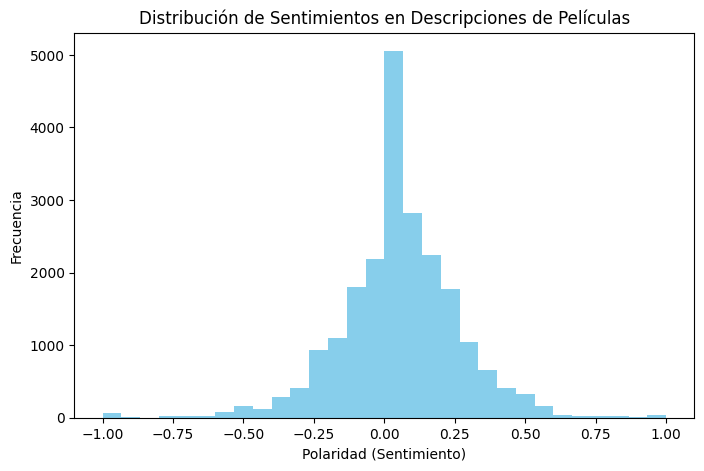

In [35]:
# Histograma de la polaridad del sentimiento
plt.figure(figsize=(8, 5))
plt.hist(df['sentimiento'], bins=30, color='skyblue')
plt.title('Distribuci√≥n de Sentimientos en Descripciones de Pel√≠culas')
plt.xlabel('Polaridad (Sentimiento)')
plt.ylabel('Frecuencia')
plt.show()

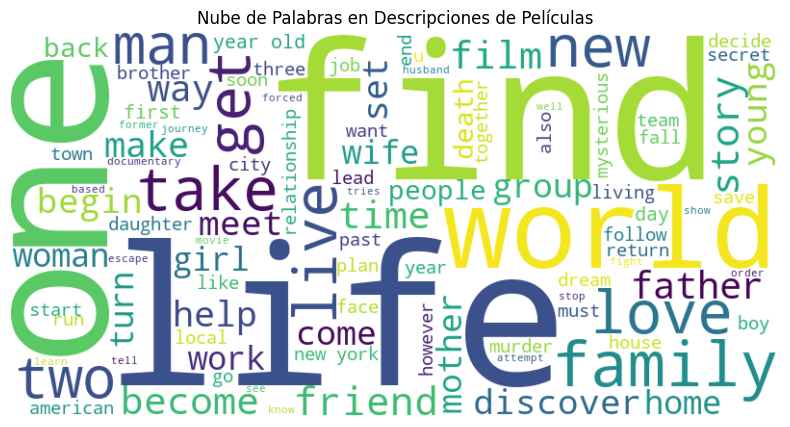

In [36]:
# Concatenamos todas las descripciones en un solo texto
texto_nube = ' '.join(df['overview_clean'])

# Creamos la nube de palabras
nube_palabras = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate(texto_nube)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras en Descripciones de Pel√≠culas')
plt.show()

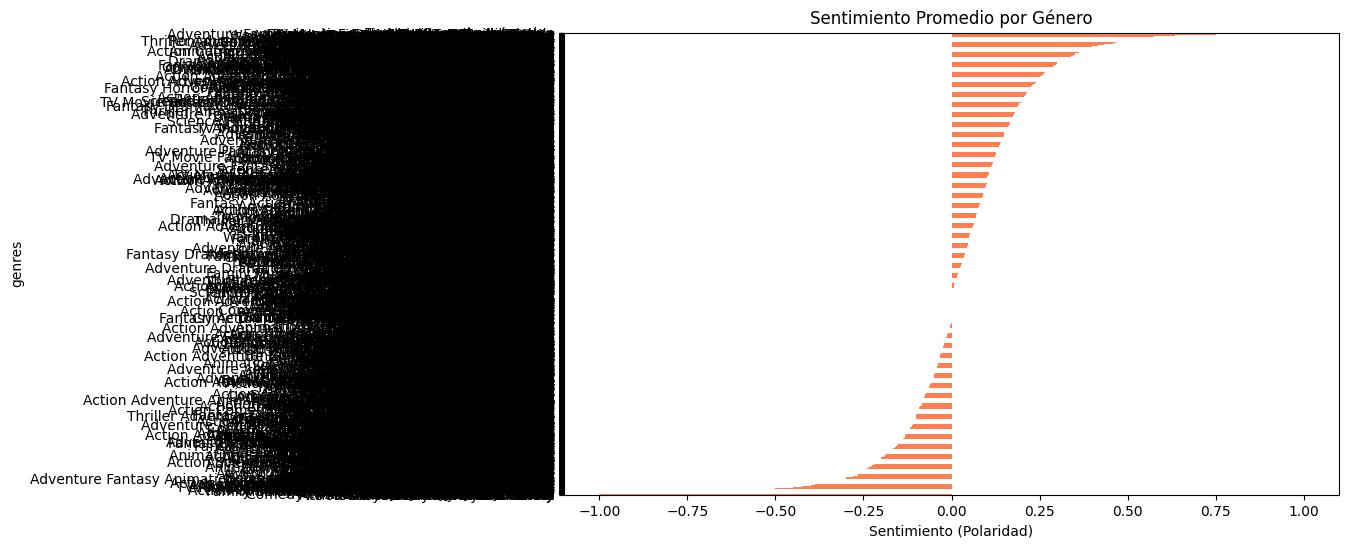

In [37]:
# Supongamos que `genres` es una lista de g√©neros en cada registro
# Expandimos la lista de g√©neros a m√∫ltiples filas para an√°lisis espec√≠fico
df_genres = df[['genres', 'sentimiento']].explode('genres')

# Calculamos el sentimiento promedio por g√©nero
sentimiento_por_genero = df_genres.groupby('genres')['sentimiento'].mean()

# Visualizamos el sentimiento promedio por g√©nero
sentimiento_por_genero.sort_values().plot(kind='barh', figsize=(10, 6), color='coral')
plt.title('Sentimiento Promedio por G√©nero')
plt.xlabel('Sentimiento (Polaridad)')
plt.show()

Guarda el df en formato parquet para realizar el modelo

In [20]:
#df['todo']=df['overview']+df['genres']

In [21]:
#df.head(2)

id belongs_to_collection    budget                    genres  \
0   862  Toy Story Collection  30000000   Animation Comedy Family   
1  8844        No collecction  65000000  Adventure Fantasy Family   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  When siblings Judy and Peter discover an encha...   17.015539   

                                production_companies  \
0                            Pixar Animation Studios   
1  TriStar Pictures Teitler Film Interscope Commu...   

       production_countries release_date      revenue  runtime  \
0  United States of America   1995-10-30  373554033.0     81.0   
1  United States of America   1995-12-15  262797249.0    104.0   

   spoken_languages      title  vote_average  vote_count  release_year  \
0           English  Toy Story           7.7      5415.0          1995   
1  English Fran√ßais    Jumanji           6.9      2413.0          1995   

                                        actor       director     return  \
0             Tom Hanks Tim Allen Don Rickles  John Lasseter  12.451801   
1  Robin Williams Jonathan Hyde Kirsten Dunst   Joe Johnston   4.043035   

                                                todo  
0  Led by Woody, Andy's toys live happily in his ...  
1  When siblings Judy and Peter discover an encha...

In [ ]:
# Importamos la clase '' dek m√≥dulo 'feature' de la libreria sklearn
from sklear.feature_extraction.text import CountVectorizer

In [ ]:
# Instanciamos un objeto para convertir textos en representaciones n√∫mericas, es decir en una matriz de conteo de palabra
m_vect=CountVectorizer(max_features=500, stop_words= 'english')

In [ ]:
# realizamos el proceso de transformacion  de la columna 'tag'
vect= m_vect.fit_transform